# Sales Prediction
This dataset comprises of sales transactions captured at a retail store. It’s a classic dataset to explore and expand your feature engineering skills and day to day understanding from multiple shopping experiences. This is a regression problem. The dataset has 200,000 rows and 12 columns.


# Problem: Predict purchase amount.

# Data Manipulation

In [15]:

import pandas as pd
import numpy as np

#visualiation data
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode, iplot

#default theme
plt.style.use('ggplot')
sns.set(context='notebook', style='darkgrid', palette='colorblind', font='sans-serif', font_scale=1, rc=None)
matplotlib.rcParams['figure.figsize'] =[8,8]
matplotlib.rcParams.update({'font.size': 15})
matplotlib.rcParams['font.family'] = 'sans-serif'

In [16]:
train = pd.read_csv('/content/train.csv')
# test = pd.read_csv('/content/test.csv')
train.head(5)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [17]:
train.shape

(200000, 12)

In [18]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     200000 non-null  int64  
 1   Product_ID                  200000 non-null  object 
 2   Gender                      200000 non-null  object 
 3   Age                         200000 non-null  object 
 4   Occupation                  200000 non-null  int64  
 5   City_Category               200000 non-null  object 
 6   Stay_In_Current_City_Years  200000 non-null  object 
 7   Marital_Status              200000 non-null  int64  
 8   Product_Category_1          200000 non-null  int64  
 9   Product_Category_2          138024 non-null  float64
 10  Product_Category_3          61304 non-null   float64
 11  Purchase                    200000 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 18.3+ MB


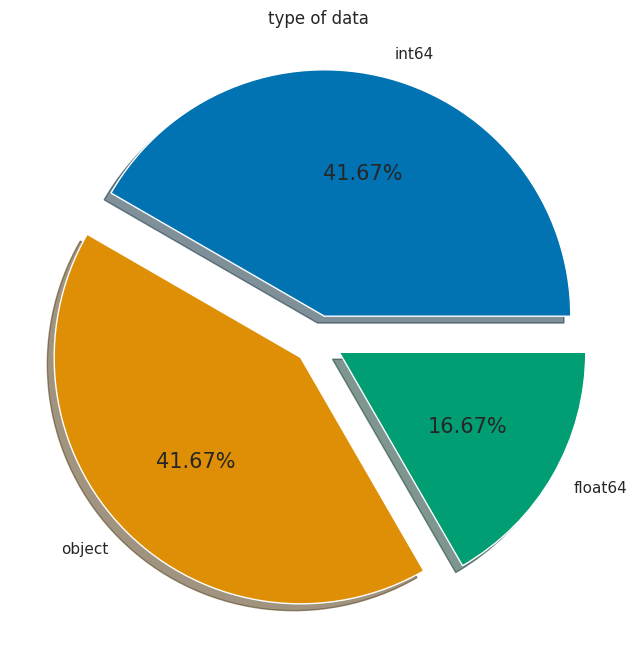

In [19]:
train.dtypes.value_counts().plot.pie(explode=[0.1,0.1,0.1],autopct='%1.2f%%',shadow=True)
plt.title('type of data');

In [20]:
# show the numerical values

num_columns = [f for f in train.columns if train.dtypes[f] != 'object']
num_columns.remove('Purchase')
num_columns.remove('User_ID')
num_columns

['Occupation',
 'Marital_Status',
 'Product_Category_1',
 'Product_Category_2',
 'Product_Category_3']

In [21]:
# show the categorical values

cat_columns = [f for f in train.columns if train.dtypes[f] == 'object']
cat_columns

['Product_ID', 'Gender', 'Age', 'City_Category', 'Stay_In_Current_City_Years']

In [22]:
train.describe(include='all')

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,2.000000e+05,200000,200000,200000,200000.000000,200000,200000,200000.000000,200000.000000,138024.000000,61304.000000,200000.000000
unique,NaN,3467,2,7,NaN,3,5,NaN,NaN,NaN,NaN,NaN
top,NaN,P00025442,M,26-35,NaN,B,1,NaN,NaN,NaN,NaN,NaN
freq,NaN,627,150715,79800,NaN,84036,70095,NaN,NaN,NaN,NaN,NaN
mean,1.002957e+06,NaN,NaN,NaN,8.086030,NaN,NaN,0.409200,5.289145,9.844563,12.652404,9323.773765
std,1.757583e+03,NaN,NaN,NaN,6.533938,NaN,NaN,0.491687,3.743880,5.084404,4.123064,4978.055234
min,1.000001e+06,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,1.000000,2.000000,3.000000,185.000000
25%,1.001390e+06,NaN,NaN,NaN,2.000000,NaN,NaN,0.000000,1.000000,5.000000,9.000000,5860.000000
50%,1.002996e+06,NaN,NaN,NaN,7.000000,NaN,NaN,0.000000,5.000000,9.000000,14.000000,8060.000000
75%,1.004446e+06,NaN,NaN,NaN,14.000000,NaN,NaN,1.000000,8.000000,15.000000,16.000000,12067.000000


A basic observation is that:

1.   Product P00265242 is the most popular product.
2.   Most of the transactions were made by men
3.   Age group with most transactions was 26-35.
4.   City Category with most transactions was B


In [23]:
#finding missing values

missing_values=train.isnull().sum()
percent_missing = train.isnull().sum()/train.shape[0]*100

value = {
    'missing_values':missing_values,
    'percent_missing':percent_missing
}
frame=pd.DataFrame(value)
frame

,missing_values,percent_missing
User_ID,0,0.000
Product_ID,0,0.000
Gender,0,0.000
Age,0,0.000
Occupation,0,0.000
City_Category,0,0.000
Stay_In_Current_City_Years,0,0.000
Marital_Status,0,0.000
Product_Category_1,0,0.000
Product_Category_2,61976,30.988


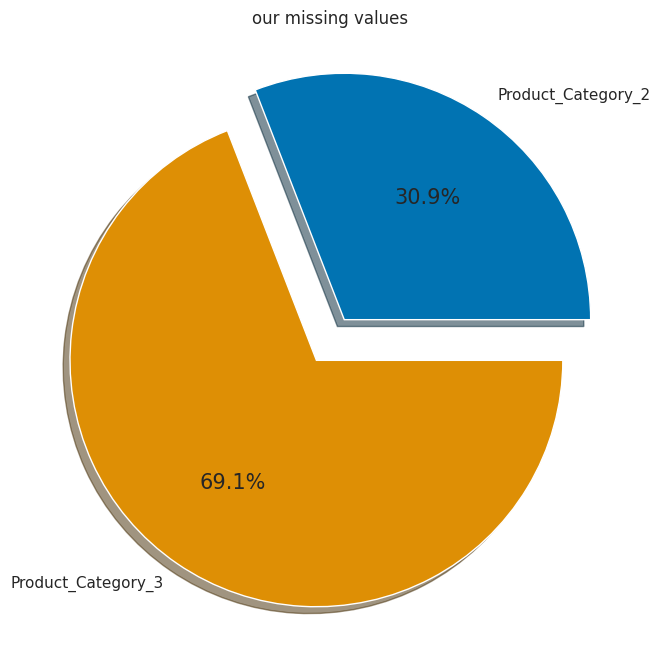

In [24]:
missing_values = train.isnull().sum()
missing_values = missing_values[missing_values > 0]
missing_values.sort_values(inplace=True)
missing_values.plot.pie(explode=[0.1,0.1],autopct='%1.1f%%',shadow=True)
plt.title('our missing values');

In [25]:
train.Product_Category_2.value_counts()

8.0     23485
14.0    20295
2.0     17960
16.0    15933
15.0    13754
5.0      9604
4.0      9543
6.0      5972
11.0     5174
17.0     4872
13.0     3837
9.0      2130
12.0     2104
10.0     1082
3.0      1054
18.0     1000
7.0       225
Name: Product_Category_2, dtype: int64

In [26]:
train.Product_Category_2.describe()

count    138024.000000
mean          9.844563
std           5.084404
min           2.000000
25%           5.000000
50%           9.000000
75%          15.000000
max          18.000000
Name: Product_Category_2, dtype: float64

In [27]:
# Replace using median
median = train['Product_Category_2'].median()
train['Product_Category_2'].fillna(median, inplace=True)

In [28]:
train.Product_Category_3.value_counts()

16.0    11838
15.0    10242
14.0     6800
17.0     6176
5.0      6159
8.0      4592
9.0      4390
12.0     3441
13.0     2009
6.0      1757
18.0     1672
11.0      688
4.0       685
10.0      636
3.0       219
Name: Product_Category_3, dtype: int64

In [29]:
# drop Product_Category_3
train=train.drop('Product_Category_3',axis=1)

In [30]:
missing_values=train.isnull().sum()
percent_missing = train.isnull().sum()/train.shape[0]*100

value = {
    'missing_values':missing_values,
    'percent_missing':percent_missing
}
frame=pd.DataFrame(value)
frame

,missing_values,percent_missing
User_ID,0,0.0
Product_ID,0,0.0
Gender,0,0.0
Age,0,0.0
Occupation,0,0.0
City_Category,0,0.0
Stay_In_Current_City_Years,0,0.0
Marital_Status,0,0.0
Product_Category_1,0,0.0
Product_Category_2,0,0.0


# Data Visualization

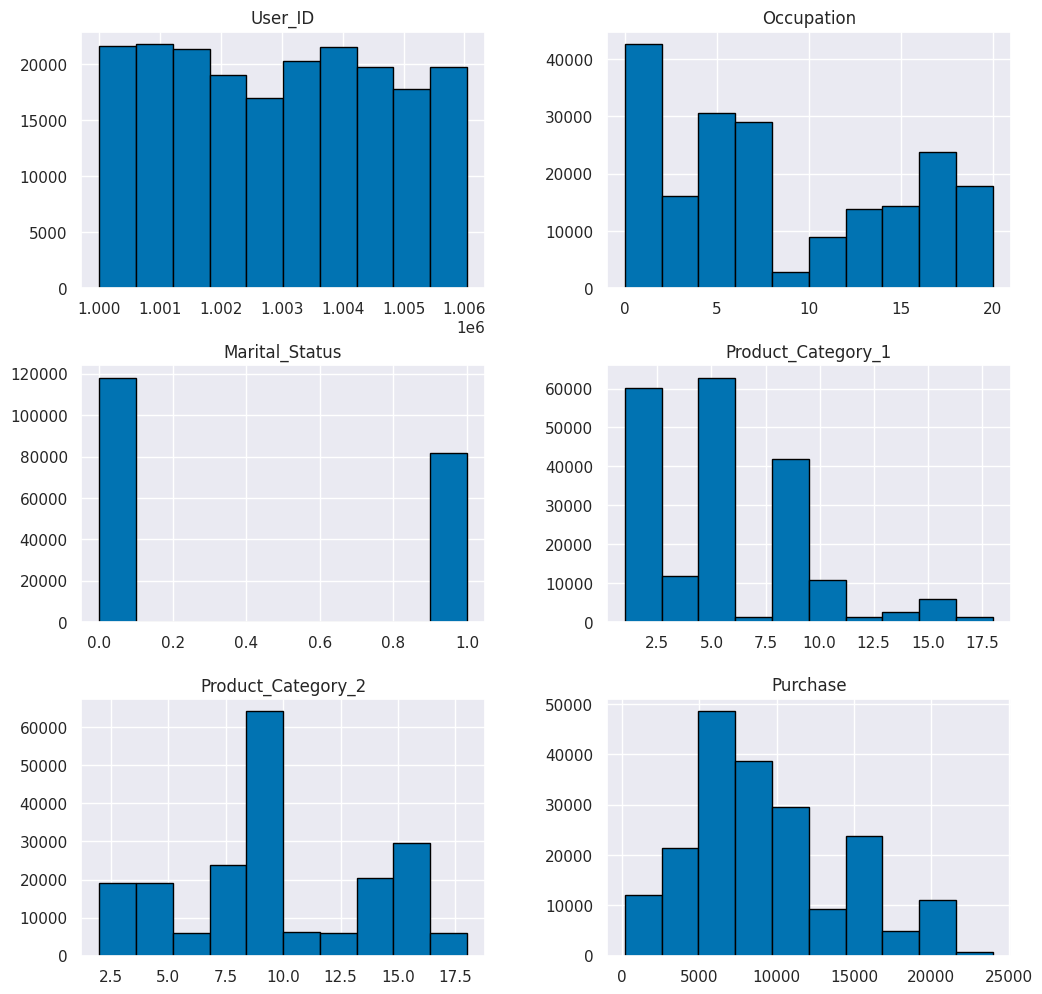

In [31]:
train.hist(edgecolor='black',figsize=(12,12));

In [32]:
train.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Purchase'],
      dtype='object')

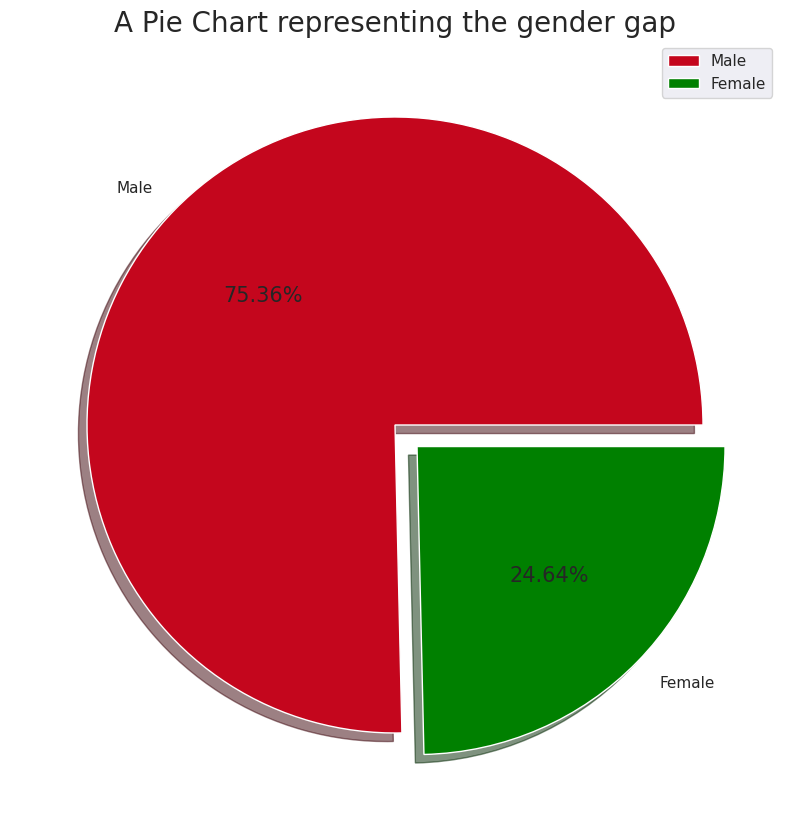

In [33]:
# pie chart
size = train['Gender'].value_counts()
labels = ['Male', 'Female']
colors = ['#C4061D', 'green']
explode = [0, 0.1]

plt.rcParams['figure.figsize'] = (10, 10)
plt.pie(size, colors = colors, labels = labels, shadow = True, explode = explode, autopct = '%.2f%%')
plt.title('A Pie Chart representing the gender gap', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()

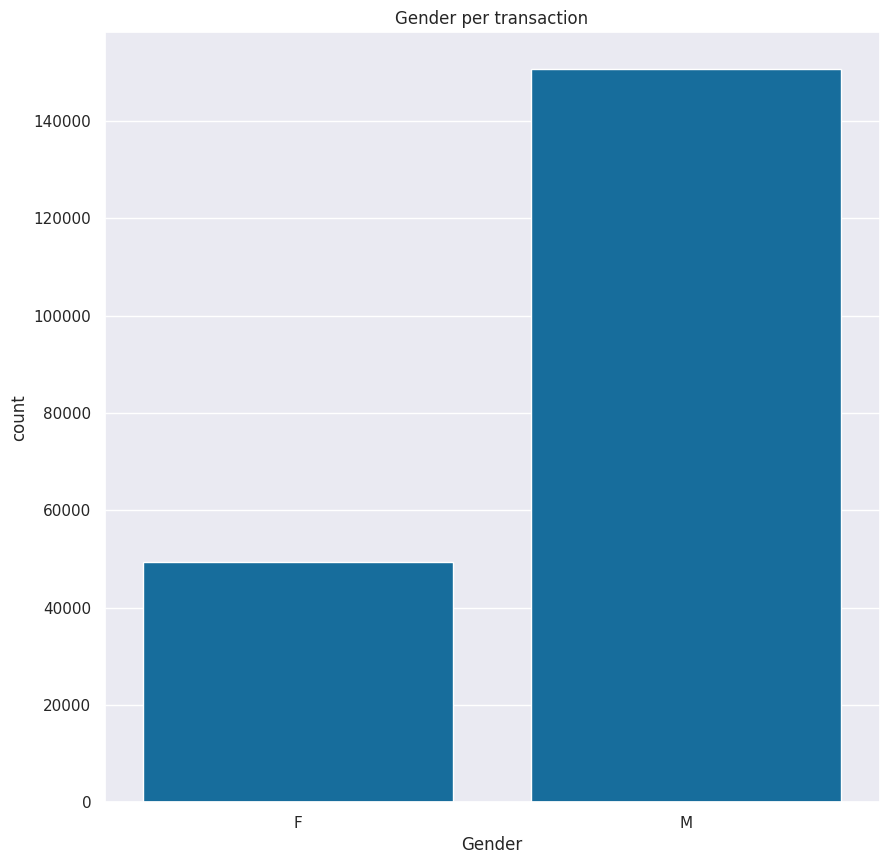

In [34]:
sns.countplot(x=train.Gender)
plt.title('Gender per transaction');

In [35]:
ageData = sorted(list(zip(train.Age.value_counts().index, train.Age.value_counts().values)))
age, productBuy = zip(*ageData)
age, productBuy = list(age), list(productBuy)
ageSeries = pd.Series((i for i in age))

data = [go.Bar(x=age,
               y=productBuy,
               name="How many products were sold",
               marker = dict(color=['black', 'yellow', 'green', 'blue', 'red', 'gray', '#C4061D'],
                            line = dict(color='#7C7C7C', width = .5)),
              text="Age: " + ageSeries)]
layout = go.Layout(title= "How many products were sold by ages")
fig = go.Figure(data=data, layout=layout)
iplot(fig)

In [36]:
palette=sns.color_palette("Set2")

<ipython-input-37-c145276693bc>:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.

<ipython-input-37-c145276693bc>:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-37-c145276693bc>:4: UserWarning:


The palette list has fewer values (8) than needed (21) and will cycle, which may produce an uninterpretable plot.



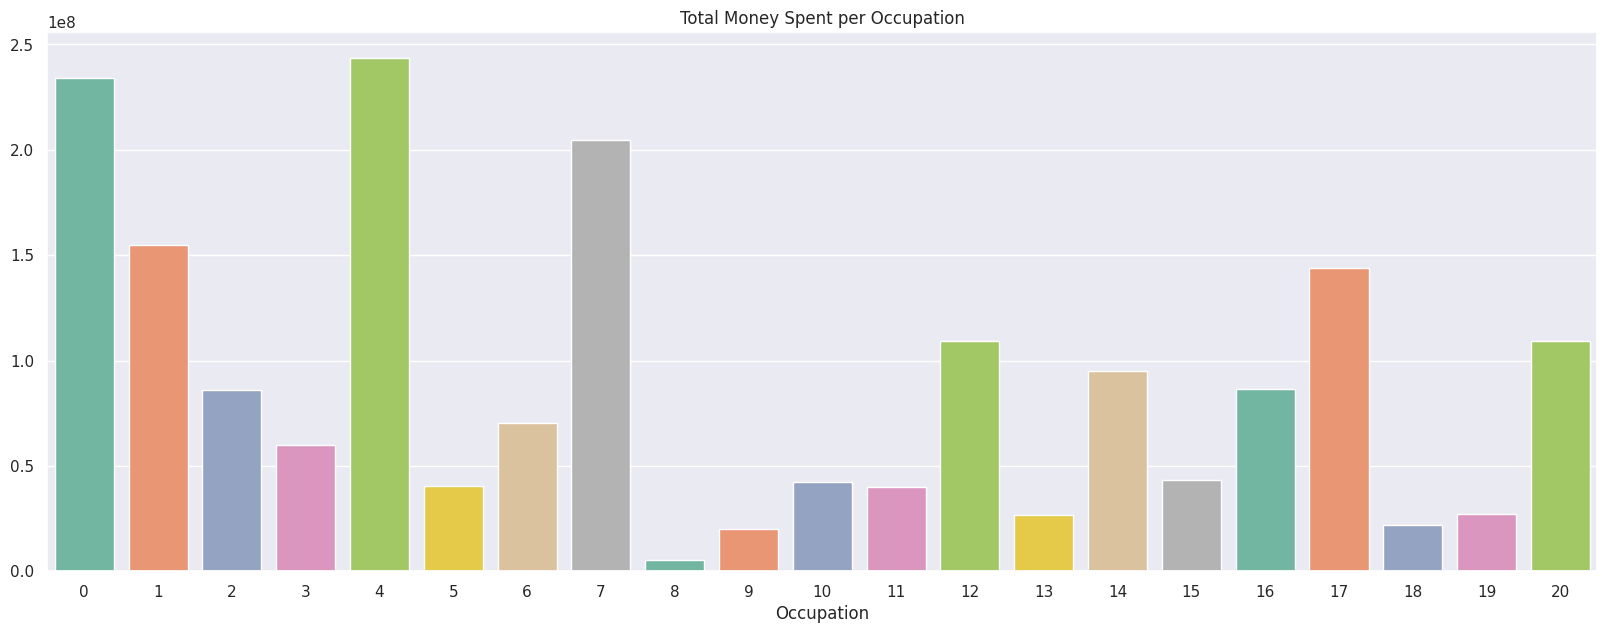

In [37]:
spent_by_occ = train.groupby(by='Occupation').sum()['Purchase']
plt.figure(figsize=(20, 7))

sns.barplot(x=spent_by_occ.index,y=spent_by_occ.values,palette = palette)
plt.title('Total Money Spent per Occupation')
plt.show()

<ipython-input-38-e81f6b97f622>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-38-e81f6b97f622>:2: UserWarning:

The palette list has more values (8) than needed (3), which may not be intended.



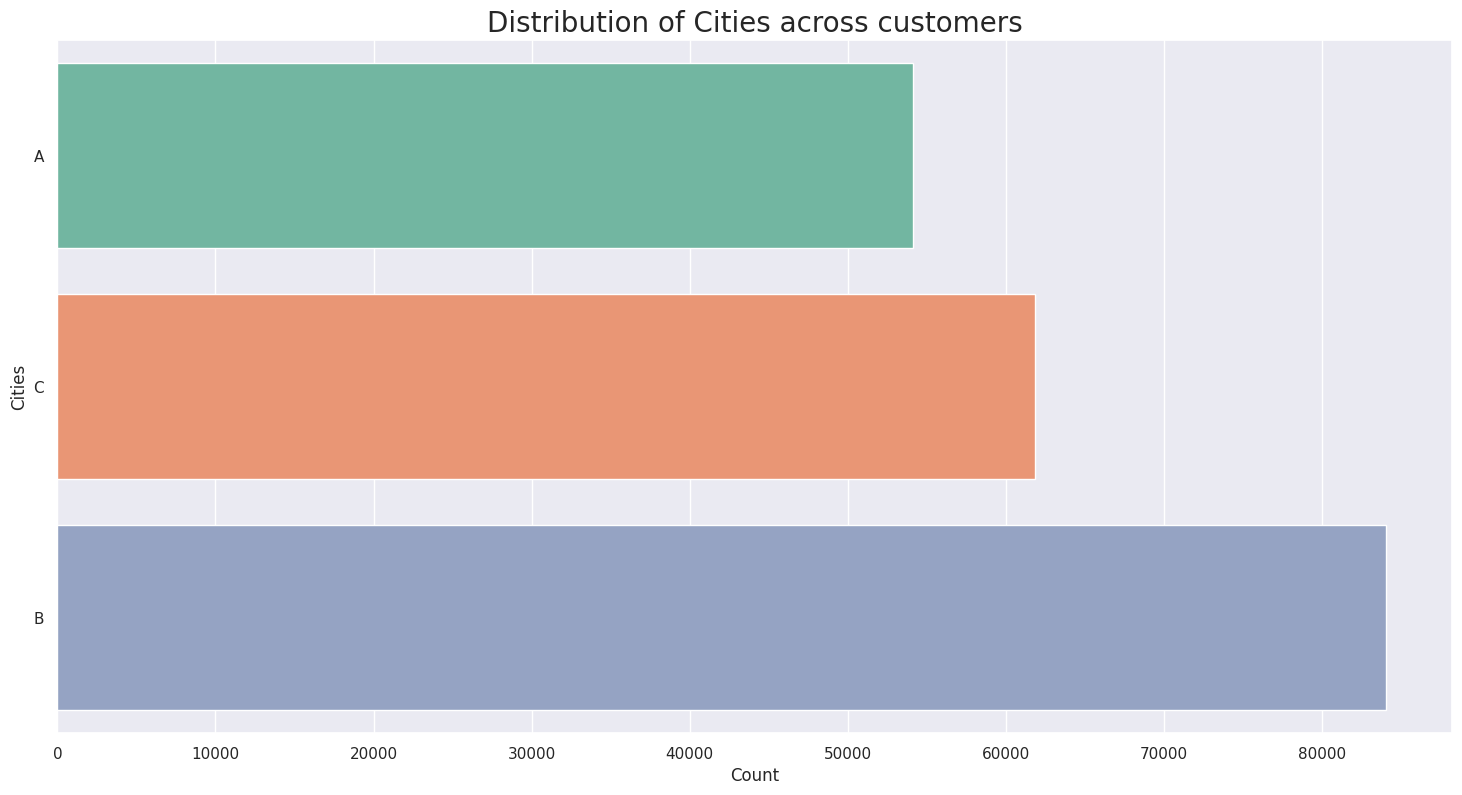

In [38]:
plt.rcParams['figure.figsize'] = (18, 9)
sns.countplot(train['City_Category'], palette = palette)
plt.title('Distribution of Cities across customers', fontsize = 20)
plt.xlabel('Count')
plt.ylabel('Cities')
plt.show()

<ipython-input-39-44aa82024ce3>:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-39-44aa82024ce3>:4: UserWarning:


The palette list has fewer values (8) than needed (18) and will cycle, which may produce an uninterpretable plot.



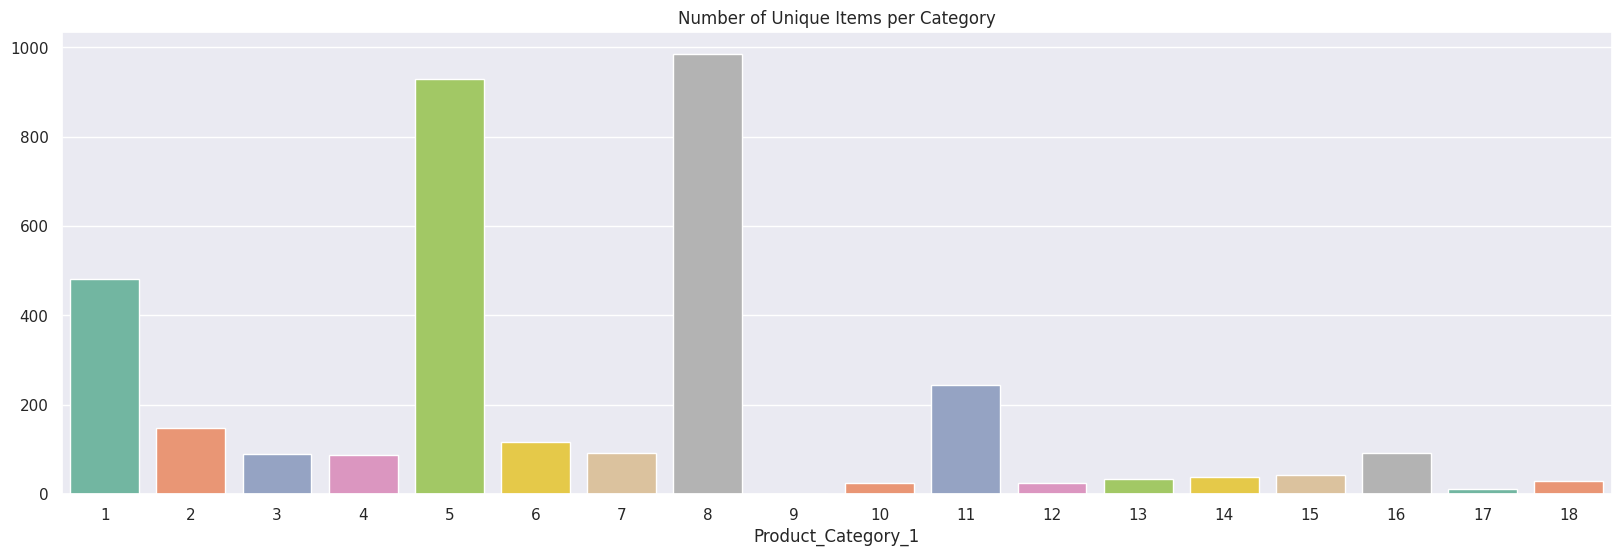

In [39]:
plt.figure(figsize=(20,6))
prod_by_cat = train.groupby('Product_Category_1')['Product_ID'].nunique()

sns.barplot(x=prod_by_cat.index,y=prod_by_cat.values, palette=palette)
plt.title('Number of Unique Items per Category')
plt.show()

<ipython-input-40-3318d765257d>:14: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-40-3318d765257d>:14: UserWarning:


The palette list has fewer values (8) than needed (18) and will cycle, which may produce an uninterpretable plot.



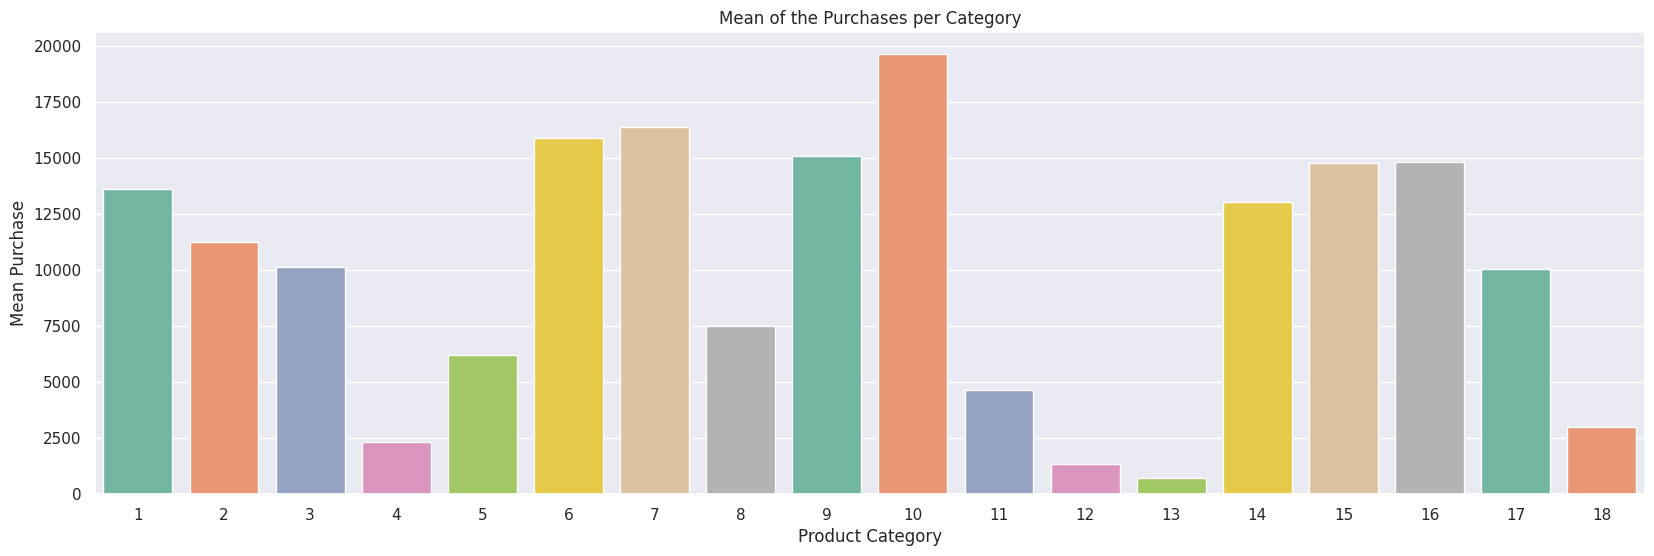

In [40]:
category = []
mean_purchase = []


for i in train['Product_Category_1'].unique():
    category.append(i)
category.sort()

for e in category:
    mean_purchase.append(train[train['Product_Category_1']==e]['Purchase'].mean())

plt.figure(figsize=(20,6))

sns.barplot(x=category,y=mean_purchase, palette = palette)
plt.title('Mean of the Purchases per Category')
plt.xlabel('Product Category')
plt.ylabel('Mean Purchase')
plt.show()

<ipython-input-41-b852b53b9718>:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-41-b852b53b9718>:7: UserWarning:


The palette list has fewer values (8) than needed (18) and will cycle, which may produce an uninterpretable plot.

<ipython-input-41-b852b53b9718>:13: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-41-b852b53b9718>:13: UserWarning:


The palette list has fewer values (8) than needed (17) and will cycle, which may produce an uninterpretable plot.



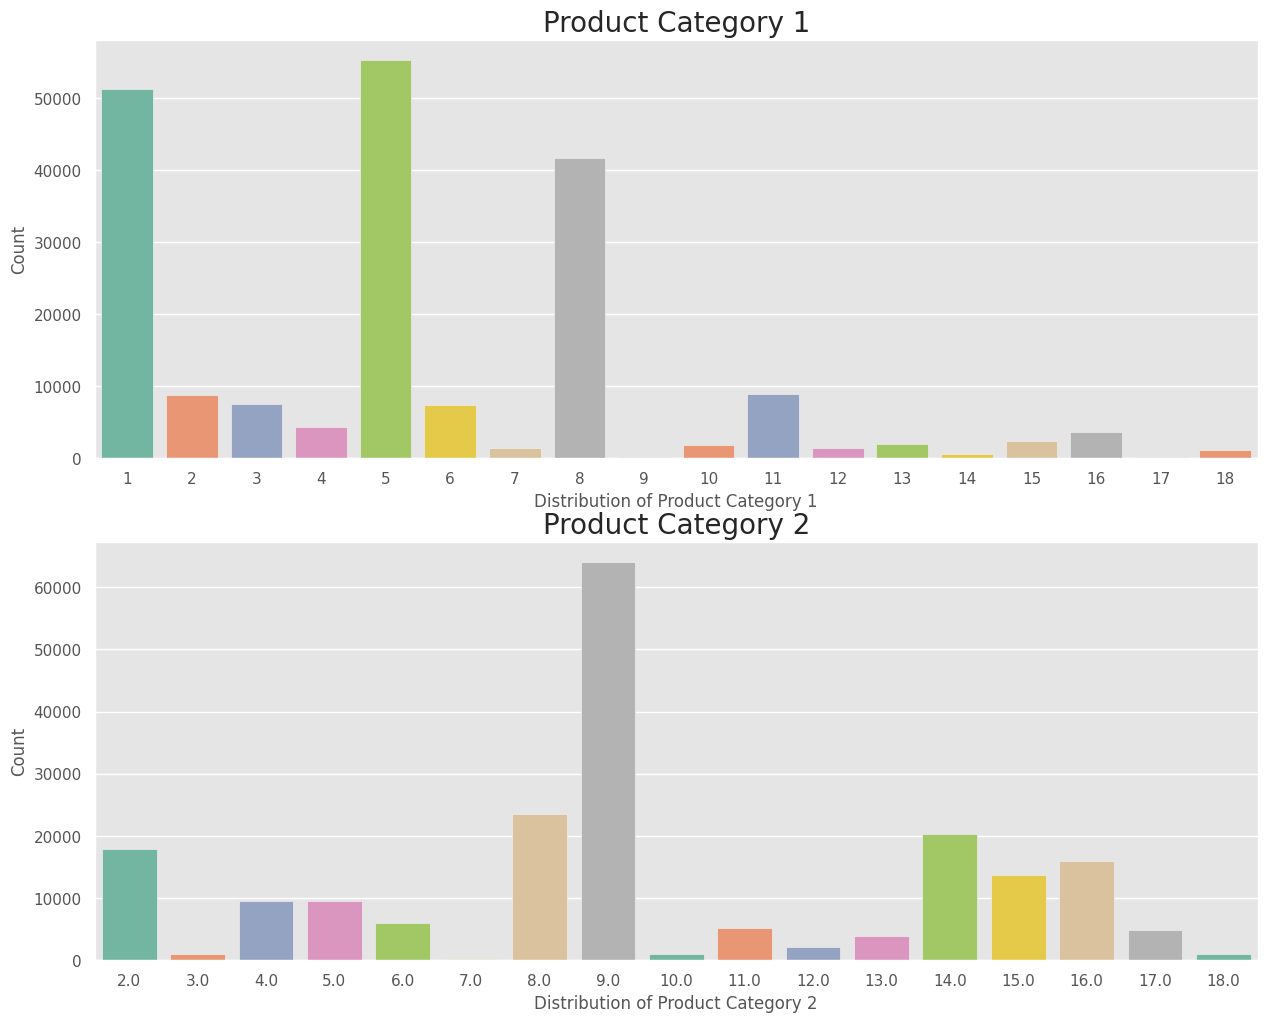

In [41]:
# visualizing the different product categories

plt.rcParams['figure.figsize'] = (15, 25)
plt.style.use('ggplot')

plt.subplot(4, 1, 1)
sns.countplot(x=train['Product_Category_1'], palette = palette)
plt.title('Product Category 1', fontsize = 20)
plt.xlabel('Distribution of Product Category 1')
plt.ylabel('Count')

plt.subplot(4, 1, 2)
sns.countplot(x=train['Product_Category_2'], palette = palette)
plt.title('Product Category 2', fontsize = 20)
plt.xlabel('Distribution of Product Category 2')
plt.ylabel('Count')


plt.show()

# Data Normalizattion

In [42]:
#the purchase attribute which is our target variable
# importing libraries
from scipy import stats
from scipy.stats import norm

<ipython-input-43-1a11ab7929d1>:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




The mu 9323.773765 and Sigma 4978.042789035941 for the curve


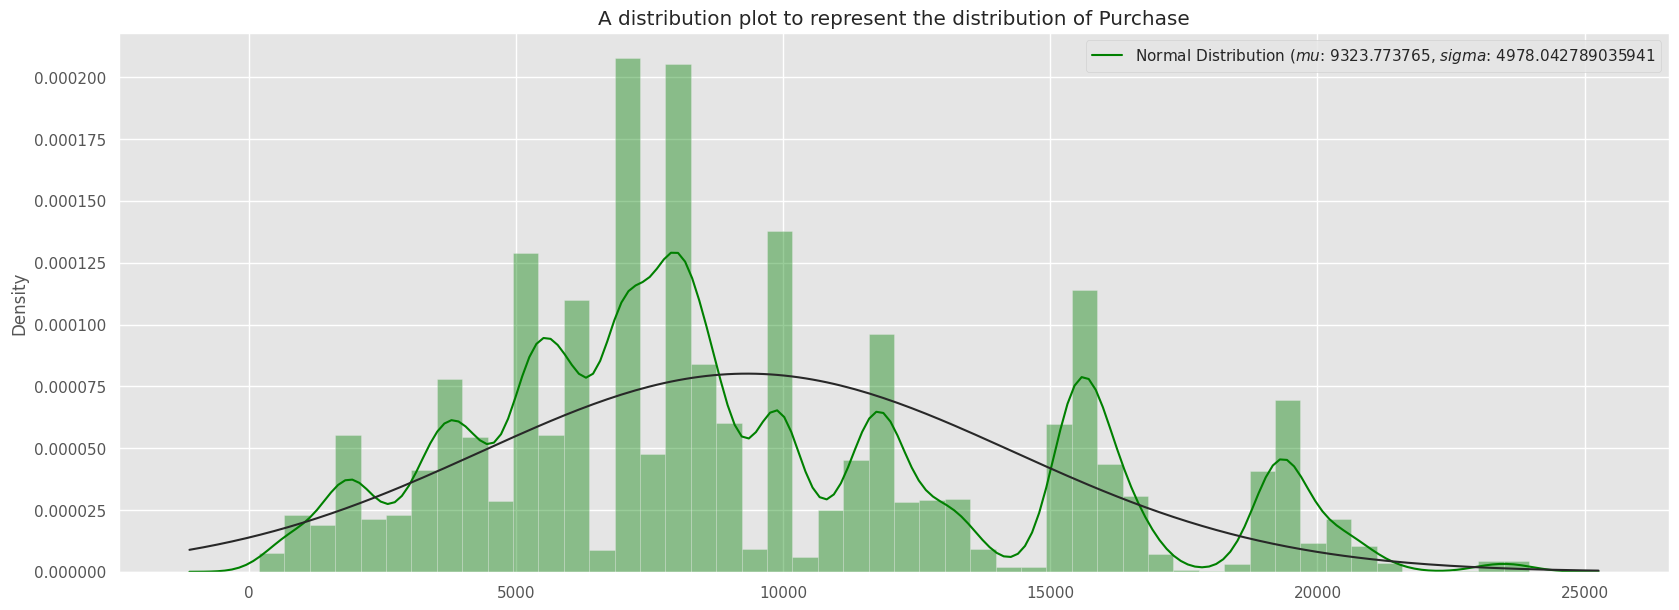

In [43]:
# plotting a distribution plot for the target variable
plt.rcParams['figure.figsize'] = (20, 7)
sns.distplot(x=train['Purchase'], color = 'green', fit = norm)

# fitting the target variable to the normal curve
mu, sigma = norm.fit(train['Purchase'])
print("The mu {} and Sigma {} for the curve".format(mu, sigma))

plt.title('A distribution plot to represent the distribution of Purchase')
plt.legend(['Normal Distribution ($mu$: {}, $sigma$: {}'.format(mu, sigma)], loc = 'best')
plt.show()

In [44]:
train = train.drop(['Product_ID','User_ID'],axis=1)

In [45]:
# checking the new shape of data
print(train.shape)
train

(200000, 9)


,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase
0,F,0-17,10,A,2,0,3,9.0,8370
1,F,0-17,10,A,2,0,1,6.0,15200
2,F,0-17,10,A,2,0,12,9.0,1422
3,F,0-17,10,A,2,0,12,14.0,1057
4,M,55+,16,C,4+,0,8,9.0,7969
...,...,...,...,...,...,...,...,...,...
199995,F,26-35,1,B,3,1,5,14.0,8835
199996,F,26-35,1,B,3,1,8,14.0,6024
199997,F,26-35,1,B,3,1,8,14.0,8085
199998,F,26-35,1,B,3,1,5,14.0,5299


In [46]:
df_Gender = pd.get_dummies(train['Gender'])
df_Age = pd.get_dummies(train['Age'])
df_City_Category = pd.get_dummies(train['City_Category'])
df_Stay_In_Current_City_Years = pd.get_dummies(train['Stay_In_Current_City_Years'])

data_final= pd.concat([train, df_Gender, df_Age, df_City_Category, df_Stay_In_Current_City_Years], axis=1)

data_final.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase,F,...,51-55,55+,A,B,C,0,1,2,3,4+
0,F,0-17,10,A,2,0,3,9.0,8370,1,...,0,0,1,0,0,0,0,1,0,0
1,F,0-17,10,A,2,0,1,6.0,15200,1,...,0,0,1,0,0,0,0,1,0,0
2,F,0-17,10,A,2,0,12,9.0,1422,1,...,0,0,1,0,0,0,0,1,0,0
3,F,0-17,10,A,2,0,12,14.0,1057,1,...,0,0,1,0,0,0,0,1,0,0
4,M,55+,16,C,4+,0,8,9.0,7969,0,...,0,1,0,0,1,0,0,0,0,1


In [47]:
data_final = data_final.drop(['Gender','Age','City_Category','Stay_In_Current_City_Years'],axis=1)
data_final

,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Purchase,F,M,0-17,18-25,26-35,...,51-55,55+,A,B,C,0,1,2,3,4+
0,10,0,3,9.0,8370,1,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
1,10,0,1,6.0,15200,1,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
2,10,0,12,9.0,1422,1,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
3,10,0,12,14.0,1057,1,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
4,16,0,8,9.0,7969,0,1,0,0,0,...,0,1,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,1,1,5,14.0,8835,1,0,0,0,1,...,0,0,0,1,0,0,0,0,1,0
199996,1,1,8,14.0,6024,1,0,0,0,1,...,0,0,0,1,0,0,0,0,1,0
199997,1,1,8,14.0,8085,1,0,0,0,1,...,0,0,0,1,0,0,0,0,1,0
199998,1,1,5,14.0,5299,1,0,0,0,1,...,0,0,0,1,0,0,0,0,1,0


In [48]:
data_final.dtypes

Occupation              int64
Marital_Status          int64
Product_Category_1      int64
Product_Category_2    float64
Purchase                int64
F                       uint8
M                       uint8
0-17                    uint8
18-25                   uint8
26-35                   uint8
36-45                   uint8
46-50                   uint8
51-55                   uint8
55+                     uint8
A                       uint8
B                       uint8
C                       uint8
0                       uint8
1                       uint8
2                       uint8
3                       uint8
4+                      uint8
dtype: object

# Training and Testing

In [49]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score

In [50]:
x=data_final.drop('Purchase',axis=1)
y=data_final.Purchasex=data_final.drop('Purchase',axis=1)
y=data_final.Purchase

<ipython-input-50-24607c243c0a>:2: UserWarning:

Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access



In [51]:
print(x.shape)
print(y.shape)

(200000, 21)
(200000,)


In [52]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25)

In [53]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [54]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(x_train, y_train)
print(lm.fit(x_train, y_train))

LinearRegression()


In [55]:
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None)

LinearRegression()

In [56]:
print('Intercept parameter:', lm.intercept_)
coeff_df = pd.DataFrame(lm.coef_, x.columns, columns=['Coefficient'])
print(coeff_df)

Intercept parameter: 9329.015241065194
                     Coefficient
Occupation          2.677738e+01
Marital_Status     -3.285460e+01
Product_Category_1 -1.449718e+03
Product_Category_2 -2.724950e+02
F                   4.113853e+15
M                   4.113853e+15
0-17                8.155848e+15
18-25               1.953555e+16
26-35               2.466117e+16
36-45               2.004169e+16
46-50               1.384298e+16
51-55               1.280861e+16
55+                 9.751750e+15
A                  -4.438509e+15
B                  -4.929007e+15
C                  -4.618185e+15
0                  -1.443079e+16
1                  -2.009931e+16
2                  -1.637272e+16
3                  -1.593047e+16
4+                 -1.523989e+16


In [57]:
predictions = lm.predict(x_test)
print("Predicted purchases (in dollars) for new costumers:", predictions)

Predicted purchases (in dollars) for new costumers: [10741.01524107  9495.01524107  9229.01524107 ...  9029.01524107
  8327.01524107  7901.01524107]


In [58]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
rmse = metrics.mean_squared_error(y_test, predictions, squared=False)
print('RMSE: ',rmse)

MAE: 3626.63016978041
MSE: 22257320.714148544
RMSE:  4717.766496356994


In [59]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Initialize the Random Forest regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_regressor.fit(X_train, y_train)

# Make predictions
y_pred = rf_regressor.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r_squared = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared:", r_squared)




Mean Absolute Error (MAE): 2276.77781479014
Mean Squared Error (MSE): 9607510.53322873
Root Mean Squared Error (RMSE): 3099.5984470941926
R-squared: 0.6134796794633464


In [60]:
percentage_r_squared = r_squared * 100
print("Percentage R-squared:", percentage_r_squared)

Percentage R-squared: 61.347967946334634


# LSTM Model and ARIMA Model

In [61]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Reshape the data for LSTM input: (samples, timesteps, features)
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

# Initialize the LSTM model
lstm_model = Sequential()

# Add LSTM layer
lstm_model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
# Add another LSTM layer
lstm_model.add(LSTM(units=50, return_sequences=False))
# Add output layer
lstm_model.add(Dense(units=1))

# Compile the model
lstm_model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
lstm_model.fit(X_train, y_train, epochs=100, batch_size=32)

# Make predictions
y_pred = lstm_model.predict(X_test)

# Reshape y_pred for evaluation
y_pred = y_pred.reshape(y_pred.shape[0])

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r_squared = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared:", r_squared)


Epoch 1/100
5000/5000 [==============================] - 26s 4ms/step - loss: 109689384.0000
Epoch 2/100
5000/5000 [==============================] - 21s 4ms/step - loss: 106123496.0000
Epoch 3/100
5000/5000 [==============================] - 21s 4ms/step - loss: 102669096.0000
Epoch 4/100
5000/5000 [==============================] - 21s 4ms/step - loss: 99289736.0000
Epoch 5/100
5000/5000 [==============================] - 21s 4ms/step - loss: 95986984.0000
Epoch 6/100
5000/5000 [==============================] - 21s 4ms/step - loss: 92756400.0000
Epoch 7/100
5000/5000 [==============================] - 26s 5ms/step - loss: 89604736.0000
Epoch 8/100
5000/5000 [==============================] - 26s 5ms/step - loss: 86531424.0000
Epoch 9/100
5000/5000 [==============================] - 21s 4ms/step - loss: 83528840.0000
Epoch 10/100
5000/5000 [==============================] - 22s 4ms/step - loss: 80604560.0000
Epoch 11/100
5000/5000 [==============================] - 24s 5ms/step - los

In [69]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.tsa.arima.model import ARIMA

# Assuming X is your feature matrix and y is your target variable
# Make sure x and y are defined before this point

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert y_train to a NumPy array
y_train_np = y_train.to_numpy()

# Fit ARIMA model
arima_model = ARIMA(y_train_np, order=(5, 1, 0))
arima_fit = arima_model.fit()

# Make predictions
y_pred = arima_fit.forecast(steps=len(y_test))

# Ensure the shape of y_pred is one-dimensional
y_pred = y_pred.flatten()

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r_squared = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)

Mean Squared Error (MSE): 26482229.083270967
Root Mean Squared Error (RMSE): 5146.088717003523
